In [1]:
# !git clone https://github.com/parthv21/VOC-Semantic-Segmentation.git
# !rm ./VOC-Semantic-Segmentation/main.ipynb
# !mv ./VOC-Semantic-Segmentation/* .
# !rm -rf VOC-Semantic-Segmentation

In [2]:
from voc12 import VOC2012
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import random
import pathlib
import torch

from model.Naive import Naive
from train import train, predict
from utils.visualization import visualizePrediction
from criterion.CrossEntropy import getCrossEntropyLoss



In [3]:
# !wget https://s3.amazonaws.com/fast-ai-imagelocal/pascal-voc.tgz 
# !tar -xzf ./pascal-voc.tgz
# !rm -rf ./pascal-voc/VOC2007
# !rm ./pascal-voc.tgz

In [4]:
voc2012 = VOC2012('./pascal-voc/VOC2012/')

ptrain = pathlib.Path('./voc2012_train.h5')
pval = pathlib.Path('./voc2012_val.h5')

if ptrain.is_file() and pval.is_file():
    voc2012.load_all_data()
else:
    voc2012.read_all_data_and_save()

loading ./voc2012_train.h5
loading ./voc2012_val.h5


Train count:  1464
Val count:  1449
Train image:  (224, 224, 3)
Train label:  (224, 224)
Unique classes:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


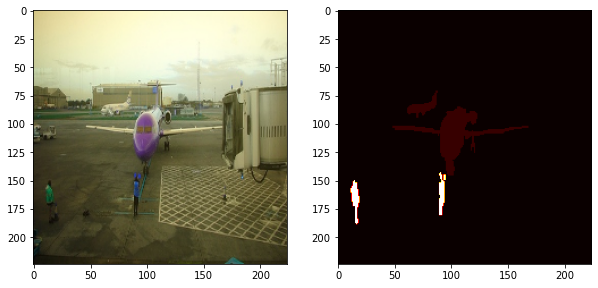

In [5]:
print("Train count: ", len(voc2012.train_images))
print("Val count: ", len(voc2012.val_images))

print("Train image: ", voc2012.train_images[0].shape)
print("Train label: ", voc2012.train_labels[0].shape)

print("Unique classes: ", np.unique(voc2012.train_labels))


plt.subplots(1,2, figsize=(10,10)) # specifying the overall grid size


plt.subplot(1,2,1)    # the number of images in the grid is 5*5 (25)
plt.imshow(voc2012.train_images[0])

plt.subplot(1,2,2)    # the number of images in the grid is 5*5 (25)
plt.imshow(voc2012.train_labels[0], cmap='hot')

plt.show()


In [8]:
# Naive model training 
trainModel = False

if trainModel:
    naive = Naive()
    train(naive, voc2012, model_name="naive", num_epochs=1, batch_size=64, learning_rate=1e-3, weight_decay=1e-5)
else:
    model = Naive()
    if torch.cuda.is_available():
        naive = torch.load("./model/naive_ce.pt")
    else:
        naive = torch.load("./model/naive_ce.pt", map_location=torch.device('cpu'))
    naive.eval()
    print(naive)


Naive(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
    (4): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): LeakyReLU(negative_slope=0.01)
    (6): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  )
  (decorder): Sequential(
    (0): ConvTranspose2d(512, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
    (4): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (5): LeakyReLU(negative_slope=0.01)
    (6): ConvTranspose2d(64, 21, kernel_size=(3, 3), stride=(2, 2), 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

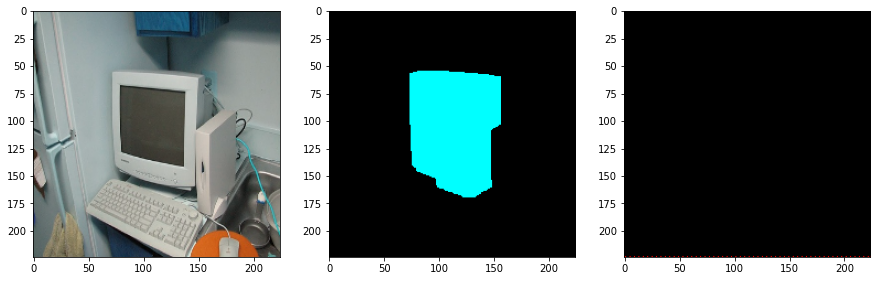

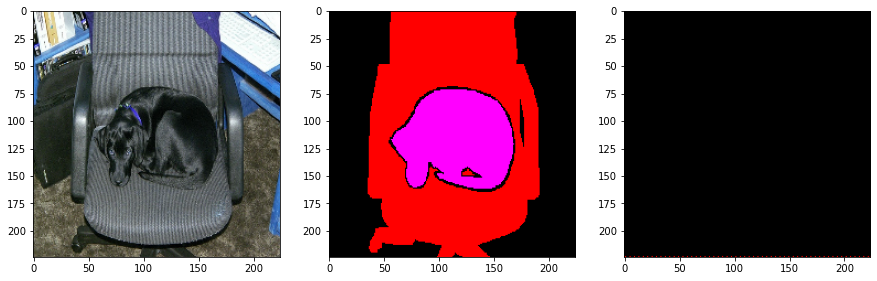

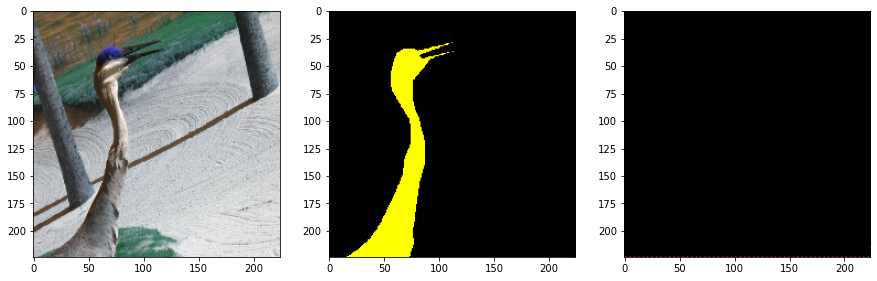

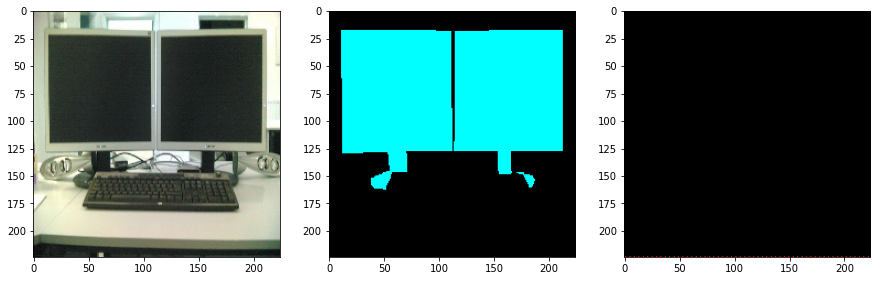

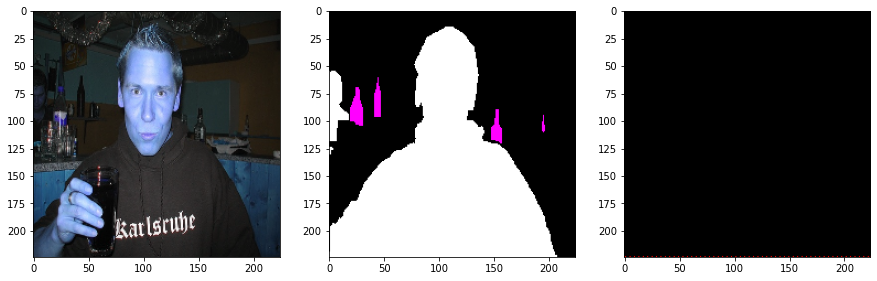

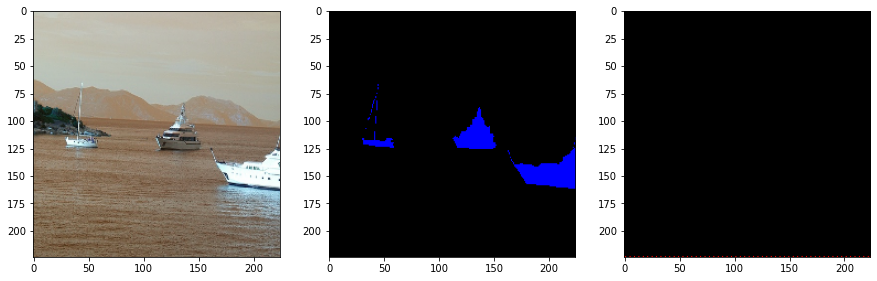

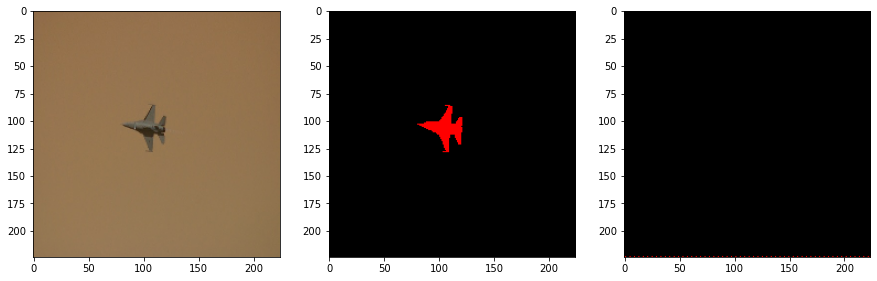

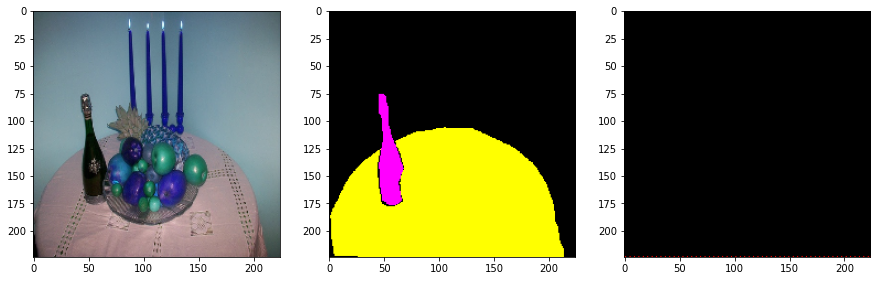

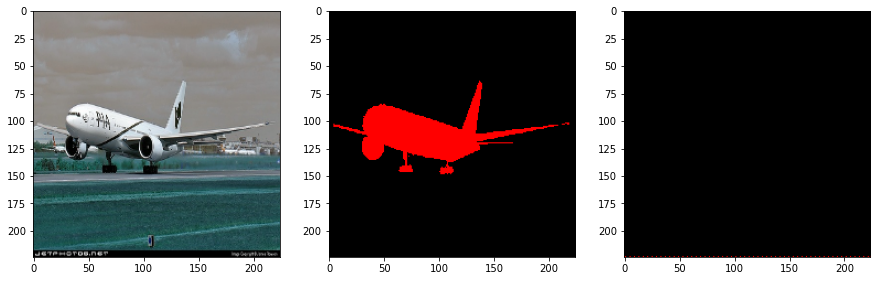

In [7]:
ind = range(1,10)

visualizePrediction(naive, voc2012.train_images[ind], voc2012.train_labels[ind])
